In [24]:
import cv2
import tensorflow as tf
from os import path
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import model
from model import make_model, get_checkpoint_dir
from ModelArch import ModelArch
from captchaSplitter import getRegionsFromImage, readImage
import importlib

In [25]:
importlib.reload(model)

<module 'model' from 'c:\\Users\\Mafciejewicz\\Documents\\repos\\psi-project-captcha\\model.py'>

In [68]:
arch = ModelArch.ARCH_3

In [69]:
checkpoint_path = path.join("checkpoints", get_checkpoint_dir(arch), "chkpt")

In [70]:
model = make_model((50,50,3), arch)

In [71]:
model.load_weights(checkpoint_path)

In [72]:
datasetPath = "lettersDataset_final"

In [73]:
labels = [f.name for f in os.scandir(path.join(datasetPath, "train")) if f.is_dir()]

In [74]:
inputCaptchaPath = "dataset\\caixa\\1m5ed.gif"
# folder = "lettersDataset_final\\test\\n\\"
# inputCaptchaPath = path.join(folder, random.choice(os.listdir(folder)))

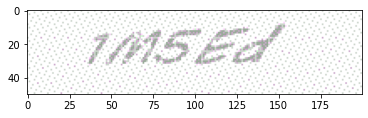

In [75]:
image = readImage(inputCaptchaPath)
plt.imshow(image)

In [76]:
letters = getRegionsFromImage(image)[0]
letters = [cv2.resize(letter, (50,50)) for letter in letters] 
letters = [cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB) for gray in letters] 

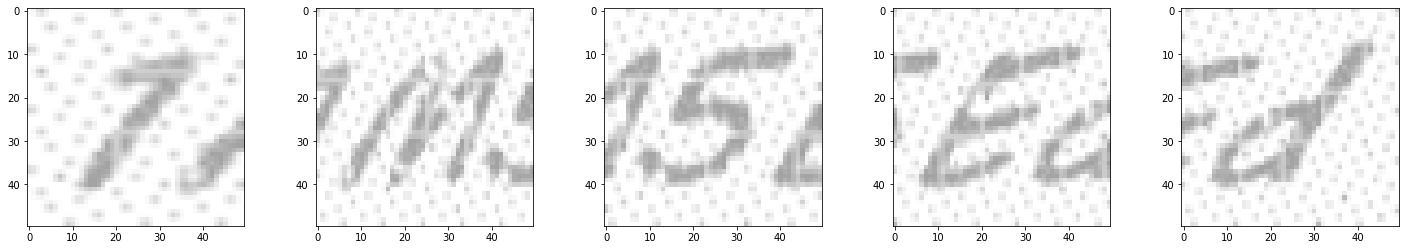

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=len(letters))
fig.set_figwidth(25)

for (i, letter) in enumerate(letters):
    ax[i].imshow(letter)

In [82]:
predictions = model.predict(np.stack(letters))

In [83]:
labeledPredictions = [zip(labels, prediction) for prediction in predictions]
predictedLetters = [max(prediction, key=lambda x: x[1]) for prediction in labeledPredictions]

In [84]:
text = "".join([letter for (letter, confidence) in predictedLetters])
confidences = [confidence for (l, confidence) in predictedLetters]

In [85]:
print(text)
print(confidences)

1m5ed
[0.98699456, 0.99670583, 0.999995, 0.9950848, 0.9995079]
